# Multivariate Gaussians and Correlations

Let's take a quick look at Gaussians, which will allow us to explore the relationship between correlations and linear dependence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, let's sample from a (zero-mean) 2D Gaussian with independent components and equal variances. I'll often use the word *isotropic* to describe such a distribution.

(-3.0, 4.0, -3.0, 3.0)

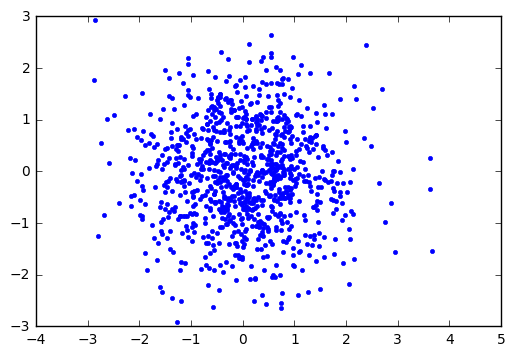

In [2]:
SIGMA = 1
NUM_SAMPLES = 1000
isotropicSamples = SIGMA*np.random.randn(2,NUM_SAMPLES)
plt.plot(isotropicSamples[0,:],isotropicSamples[1,:],'.')
plt.axis('equal')

A nonzero mean doesn't change things too much.

(6.0, 14.0, 6.0, 13.0)

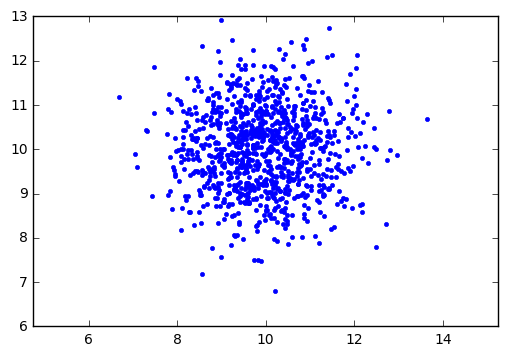

In [3]:
SIGMA = 1
MU = np.array([[10],[10]]) #This forms a 2D column vector/array
NUM_SAMPLES = 1000
isotropicSamples = MU + SIGMA*np.random.randn(2,NUM_SAMPLES)
plt.plot(isotropicSamples[0,:],isotropicSamples[1,:],'.')
plt.axis('equal')

Let's try a Gaussian with random variables that have different variances but are still independent.

(-3.0, 4.0, -8.0, 8.0)

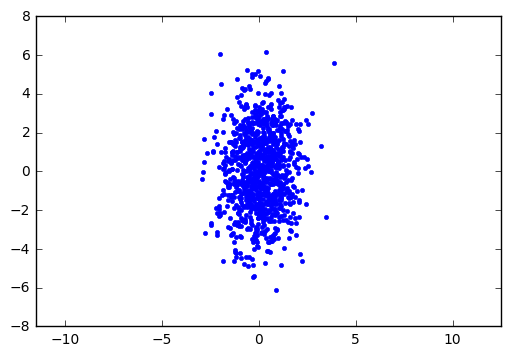

In [4]:
S1 = 1
S2 = 2
scaleMatrix = np.array([[S1,0],[0,S2]]) #This matrix has the sigmas on the diagonal. This is NOT the covariance matrix!
NUM_SAMPLES = 1000
isotropicSamples = np.random.randn(2,NUM_SAMPLES)
normalSamples = scaleMatrix@isotropicSamples

plt.plot(normalSamples[0,:],normalSamples[1,:],'.')
plt.axis('equal')

This is still pretty boring. What happens if the two random variables are correlated?

(-4.0, 3.0, -3.0, 4.0)

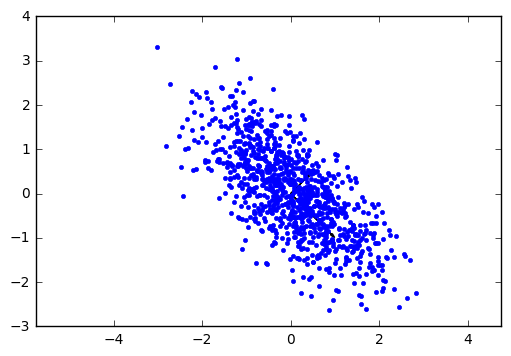

In [5]:
RHO = -0.7 #Correlation coefficient, between -1 and 1
NUM_SAMPLES = 1000
K = np.array([[1,RHO],[RHO,1]]) #Build the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(K)
scaleMatrix = eigenvectors@np.diag(np.sqrt(eigenvalues))
isotropicSamples = np.random.randn(2,NUM_SAMPLES)
correlatedSamples = scaleMatrix@isotropicSamples # Why is this the right thing to do?

plt.plot(correlatedSamples[0,:],correlatedSamples[1,:],'.')
plt.arrow(0, 0, np.sqrt(eigenvalues[0])*eigenvectors[0,0], np.sqrt(eigenvalues[0])*eigenvectors[1,0], head_width=0.05, head_length=0.1)
plt.arrow(0, 0, np.sqrt(eigenvalues[1])*eigenvectors[0,1], np.sqrt(eigenvalues[1])*eigenvectors[1,1], head_width=0.05, head_length=0.1)

plt.axis('equal')

In fact, a useful way to think of multivariate Gaussians is as *independent* Gaussians that are rotated to align with the eigenvectors of the covariance matrix. We can even build a covariance matrix by choosing the eigenvectors to determine the *direction* the random variables point in, and choosing the eigenvalues to determine the variance in the direction of each eigenvalue. Toy with the values of eig1, S1, and S2! What happens if S1=S2?

(-30.0, 40.0, -20.0, 20.0)

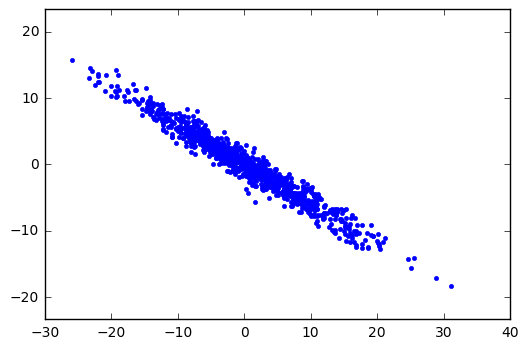

In [8]:
NUM_SAMPLES = 1000

S1 = 1;
S2 = 10; # choose the variances
eig1 = np.array([[3,5]]).T #choose the direction of the first eigenvector

eig1 = eig1/np.linalg.norm(eig1) #make sure that it is normalized!
eig2 = [[0, -1],[1, 0]]@eig1 #the second eigenvector is orthogonal to the first
eigenvectors = np.concatenate((eig1.T, eig2.T)).T
scaleMatrix = eigenvectors@np.diag([S1, S2])
isotropicSamples = np.random.randn(2,NUM_SAMPLES)
correlatedSamples = scaleMatrix@isotropicSamples # Why is this the right thing to do?

plt.arrow(0, 0, np.sqrt(eigenvalues[0])*eigenvectors[0,0], np.sqrt(eigenvalues[0])*eigenvectors[1,0], head_width=0.05, head_length=0.1)
plt.arrow(0, 0, np.sqrt(eigenvalues[1])*eigenvectors[0,1], np.sqrt(eigenvalues[1])*eigenvectors[1,1], head_width=0.05, head_length=0.1)
plt.plot(correlatedSamples[0,:],correlatedSamples[1,:],'.')

plt.axis('equal')